# Import the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#concanate the train and test dataset then mark them with 1 and 0, so they can be distinguished later

training=pd.read_csv('DA_titanic_train.csv')
test=pd.read_csv('DA_titanic_test.csv')

#training will have an extra column, that contains only 1
training['train_test']=1 
#testing will have an extra column, that contains only 0
test['train_test']=0


#remove the result of survived people from the test case
test['Survived']=np.NaN

#concanate the training and testing dataset
all_data=pd.concat([training,test])
print(all_data)

     PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              5       0.0       3   
4             10       1.0       2   
..           ...       ...     ...   
262          880       NaN       1   
263          882       NaN       3   
264          886       NaN       3   
265          887       NaN       2   
266          890       NaN       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3                             Allen, Mr. William Henry    male  35.0      0   
4                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ... 

# Data exploration

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  624 non-null    int64  
 1   Survived     624 non-null    int64  
 2   Pclass       624 non-null    int64  
 3   Name         624 non-null    object 
 4   Sex          624 non-null    object 
 5   Age          494 non-null    float64
 6   SibSp        624 non-null    int64  
 7   Parch        624 non-null    int64  
 8   Ticket       624 non-null    object 
 9   Fare         624 non-null    float64
 10  Cabin        128 non-null    object 
 11  Embarked     623 non-null    object 
 12  train_test   624 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 63.5+ KB


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,624.000000,624.000000,624.000000,494.000000,624.000000,624.000000,624.000000,624.0
mean,459.128205,0.383013,2.328526,29.658745,0.519231,0.354167,30.523470,1.0
std,257.314092,0.486511,0.822684,14.770773,1.071871,0.775559,48.186064,0.0
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000,1.0
25%,241.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,1.0
50%,460.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.931250,1.0
75%,683.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
# split numerical and categorical data

df_num=training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat=training[['Survived', 'Pclass', 'Ticket', 'Cabin', 'Embarked']]

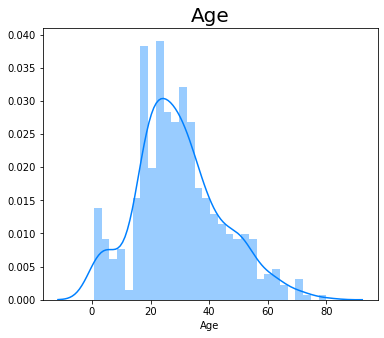

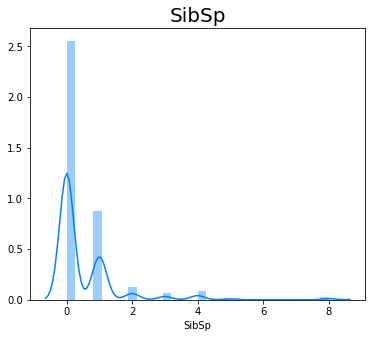

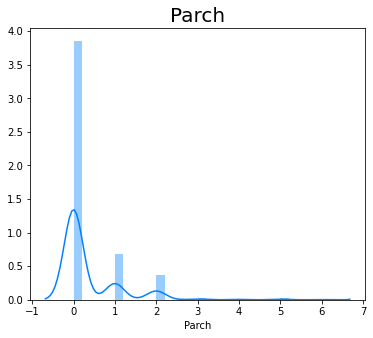

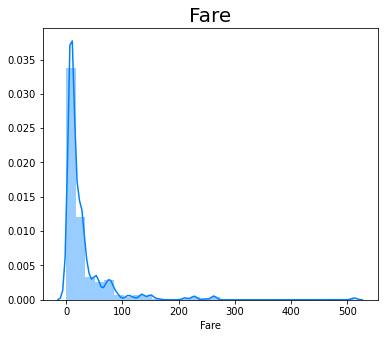

In [6]:
# check numerical datas
#for i in df_num.columns:
 #   plt.hist(df_num[i])
  #  plt.title(i)
   # plt.show()
    
for i in df_num.columns: 
    plt.figure(figsize = (6, 5))
    sns.distplot(df_num[i].dropna(), color = (0, 0.5, 1), bins = 30, kde = True, norm_hist=True)
    plt.title(i,fontsize = 20)
    plt.show()

/home/lilla/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


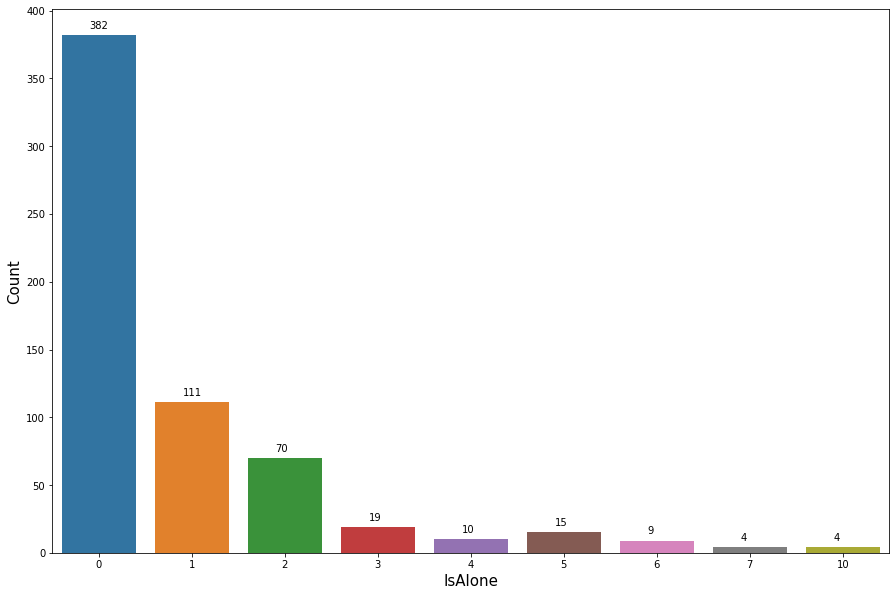

In [7]:
#Checking how many people were alone
df_num['IsAlone'] = df_num['SibSp'] + df_num['Parch']

plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'IsAlone', data = df_num)
plt.xlabel('IsAlone', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 5))
plt.show()

/usr/lib/python3/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


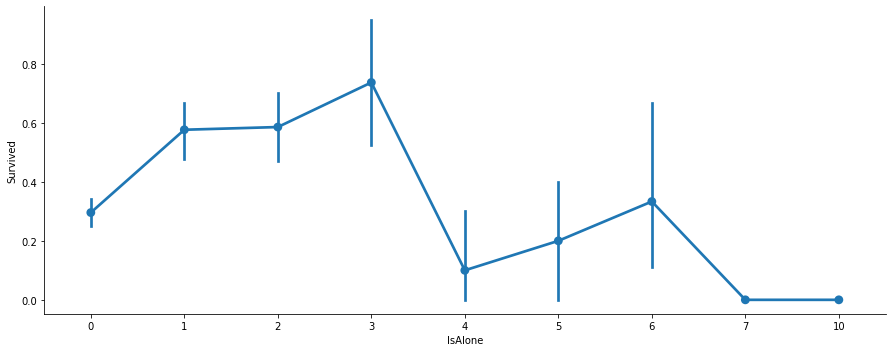

In [8]:
training['IsAlone']=training['SibSp'] + training['Parch']
axes = sns.factorplot('IsAlone','Survived', 
                      data=training, aspect = 2.5, )

              Age     SibSp     Parch      Fare   IsAlone
Age      1.000000 -0.297896 -0.196080  0.142341 -0.297822
SibSp   -0.297896  1.000000  0.434930  0.165351  0.896006
Parch   -0.196080  0.434930  1.000000  0.209408  0.789544
Fare     0.142341  0.165351  0.209408  1.000000  0.215956
IsAlone -0.297822  0.896006  0.789544  0.215956  1.000000


<AxesSubplot:>

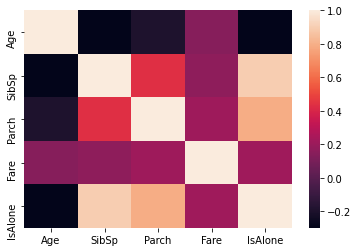

In [9]:
# checking multicollinearity

print(df_num.corr())
sns.heatmap(df_num.corr())


# negative correlation: 
# age with sibling, parents


In [10]:
# how survival rates differ across these groups


pd.pivot_table(training, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare', ])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.030612,19.702488,0.296104,0.535065
1,29.112100,47.954760,0.447699,0.493724


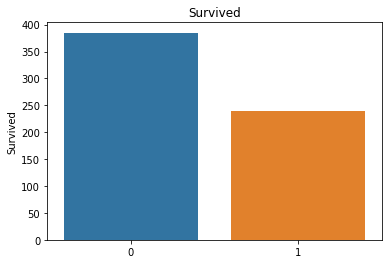

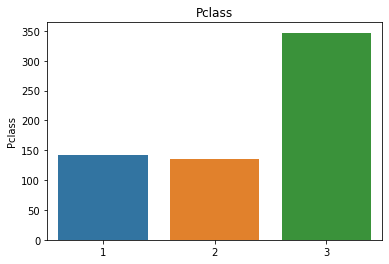

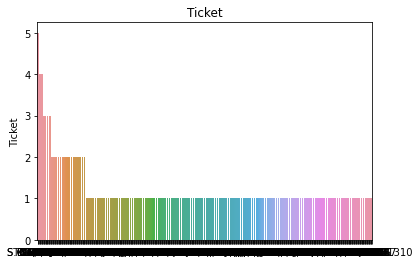

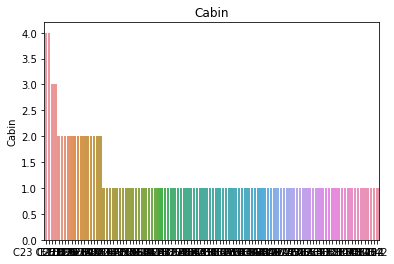

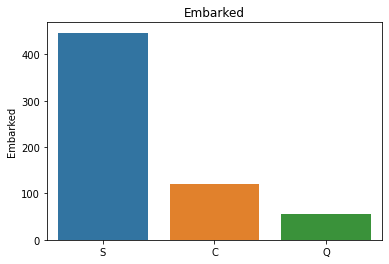

In [11]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()
    
# 1. survive rate: 370 not survived, 250 survived
# 2. People in ticket classes: 1.class: 150, 2. class: 145 3.class: 350 people
# 3. Ticket numbers distribution
# 4. Cabin numbers distribution
# 5. Embarked from : C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
#numbers of survived by Pclass, sexes, embarked places
print("By Pclass")
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print("By Ticket")
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print("By Embarked place")
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))
print()



By Pclass
Pclass     1   2    3
Survived             
0         46  73  266
1         96  62   81

By Ticket
Sex       female  male
Survived              
0             60   325
1            168    71

By Embarked place
Embarked   C   Q    S
Survived             
0         52  33  300
1         69  22  147



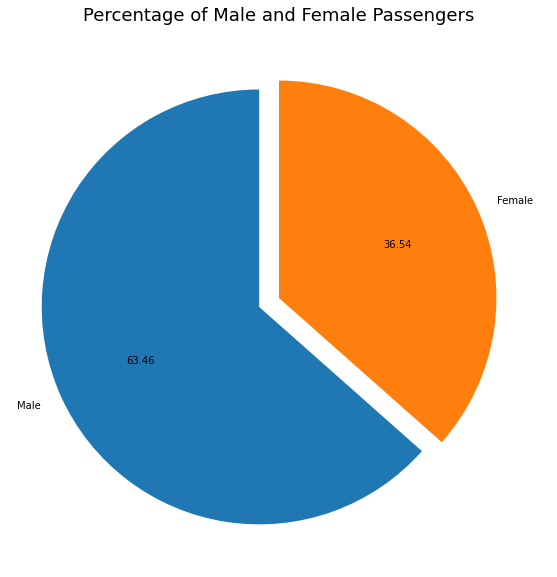

In [13]:
plt.figure(figsize = (15, 10))
plt.pie([(training.Sex == 'male').sum(), (training.Sex == 'female').sum()], labels = ["Male", "Female"], autopct = "%.2f", startangle = 90, explode = (0.1, 0.0))
plt.title('Percentage of Male and Female Passengers', fontsize = 18)
plt.show()

In [14]:
# creates categories by cabin letter
training['cabin_adv']=training.Cabin.apply(lambda x: str(x)[0])
print(training['cabin_adv'])

0      n
1      C
2      n
3      n
4      n
      ..
619    n
620    n
621    B
622    n
623    n
Name: cabin_adv, Length: 624, dtype: object


In [15]:
# comparing survival rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training, index="Survived", columns='cabin_adv', values='Name', aggfunc='count')

n    496
C     33
B     26
D     23
E     23
A     12
F      7
G      4
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,n
Survived,,,,,,,,
0,6,7,9,4,5,4,2,348
1,6,19,24,19,18,3,2,148


In [16]:
# tickets: some contains letter, maybe it tells us sthing

training['numeric_ticket']=training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters']=training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [17]:
# How many tickets only numeric --> 1
# How many tickets contains letter --> 0

training["numeric_ticket"].value_counts()

1    462
0    162
Name: numeric_ticket, dtype: int64

In [18]:
# All types of tickets-letter groups

pd.set_option('max_row', None)
training['ticket_letters'].value_counts()

0            465
pc            43
ca            23
a5            17
stono2        14
scparis        9
sotonoq        9
wc             7
c              5
a4             5
soc            4
fcc            3
scah           2
wep            2
sopp           2
pp             2
ppp            2
sotono2        1
fc             1
swpp           1
sp             1
scahbasle      1
sc             1
scow           1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [19]:
# Difference in numeric vs non-numeric tickets in survival rate (there isn't any difference)
pd.pivot_table(training, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,97,288
1,65,174


In [20]:
# survival rate across different ticket types
pd.pivot_table(training, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,c,ca,casoton,fc,fcc,pc,pp,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,290.0,5.0,16.0,3.0,13.0,1.0,1.0,NaN,12.0,NaN,...,4.0,1.0,2.0,1.0,9.0,1.0,9.0,NaN,7.0,1.0
1,175.0,NaN,1.0,2.0,10.0,NaN,NaN,3.0,31.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,1.0


In [21]:
# splitting names into person's title
training.Name.head(50)
training['name_title']=training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [22]:
    training['name_title'].value_counts()

Mr              357
Miss            128
Mrs              94
Master           24
Rev               5
Dr                5
Major             2
Mlle              2
Don               1
Ms                1
Lady              1
Col               1
Capt              1
the Countess      1
Jonkheer          1
Name: name_title, dtype: int64

# Data preprocess 

In [23]:
# creates categorical variables

# pandas 'isna' checks if there is missing values, and change it to 0
all_data['cabin_multiple']=all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

#change cabin type to its first letter
all_data['cabin_adv']=all_data.Cabin.apply(lambda x: str(x)[0])


# if the ticket doesn't contain any letter --> 1
# if the ticket does contain any letter --> 0
all_data['numeric_ticket']=all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

# collect the words/letters from the ticket name. Delete . and /, and make it lowercase
all_data['ticket_letters']=all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','')
                                                 .lower() if len(x.split(' ')[:-1]) >0 else 0)




# collect the name title (Mr, Miss, Dr etc.)
all_data['name_title']=all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())



# fill the missing places with the mean
all_data.Age=all_data.Age.fillna(training.Age.mean())
all_data.Fare=all_data.Fare.fillna(training.Fare.mean())

# drop the people, who have missing places
all_data.dropna(subset=['Embarked'], inplace=False)


all_data['norm_fare']=np.log(all_data.Fare+1)


# convert classes(the string class to str numbers (1,2,3))
all_data.Pclass= all_data.Pclass.astype(str)


In [24]:
# concanate the variables

all_variables =pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv',
                                         'cabin_multiple', 'numeric_ticket','name_title', 'train_test']])
#double check on data before splitting 

all_variables.describe(include = 'all')


,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.691097,0.523008,0.381594,2.962246,0.267116,0.741863,0.700337,0.242424,0.206510,0.551066,...,0.044893,0.204265,0.002245,0.001122,0.580247,0.140292,0.001122,0.006734,0.001122,0.001122
std,13.002025,1.102743,0.806057,0.969048,0.547134,0.437855,0.458368,0.428790,0.405028,0.497665,...,0.207186,0.403390,0.047351,0.033501,0.493796,0.347485,0.033501,0.081830,0.033501,0.033501
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,2.187218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.658745,0.000000,0.000000,2.737881,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,0.000000,3.465736,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,8.000000,6.000000,6.240917,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:

# split train and test set

X_train= all_variables[all_variables.train_test==1].drop(['train_test'], axis=1)
X_test= all_variables[all_variables.train_test==0].drop(['train_test'], axis=1)

y_train=all_data[all_data.train_test==1].Survived
y_train.shape


(624,)

In [26]:
# scale data

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
all_variables_scaled = all_variables.copy()
all_variables_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_variables_scaled[['Age','SibSp','Parch','norm_fare']])
all_variables_scaled

X_train_scaled = all_variables_scaled[all_variables_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_variables_scaled[all_variables_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

# Model building

In [27]:
     

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [28]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv1 = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv1)
print(cv1.mean())

[0.664      0.712      0.8        0.592      0.72580645]
0.6987612903225807


In [29]:
lr = LogisticRegression(max_iter = 2000)
cv2 = cross_val_score(lr,X_train,y_train,cv=5)
print(cv2)
print(cv2.mean())

[0.808      0.824      0.808      0.76       0.86290323]
0.8125806451612905


In [30]:
lr = LogisticRegression(max_iter = 2000)
cv3 = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv3)
print(cv3.mean())

[0.808      0.824      0.808      0.752      0.86290323]
0.8109806451612904


In [31]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv4 = cross_val_score(dt,X_train,y_train,cv=5)
print(cv4)
print(cv4.mean())


[0.72       0.824      0.84       0.76       0.77419355]
0.7836387096774194


In [32]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv5 = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv5)
print(cv5.mean())

[0.72       0.824      0.84       0.76       0.77419355]
0.7836387096774194


In [33]:
knn = KNeighborsClassifier()
cv6 = cross_val_score(knn,X_train,y_train,cv=5)
print(cv6)
print(cv6.mean())

[0.776      0.816      0.808      0.744      0.87096774]
0.8029935483870968


In [34]:
knn = KNeighborsClassifier()
cv7 = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv7)
print(cv7.mean())


[0.792      0.816      0.824      0.808      0.85483871]
0.8189677419354838


In [35]:


rf = RandomForestClassifier(random_state = 1)
cv8 = cross_val_score(rf,X_train,y_train,cv=5)
print(cv8)
print(cv8.mean())



[0.744      0.816      0.832      0.768      0.87096774]
0.8061935483870968


In [36]:


rf = RandomForestClassifier(random_state = 1)
cv9 = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv9)
print(cv9.mean())



[0.744      0.816      0.832      0.768      0.87903226]
0.8078064516129032


In [37]:
svc = SVC(probability = True)
cv10 = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv10)
print(cv10.mean())

[0.808      0.832      0.848      0.744      0.86290323]
0.8189806451612904


In [38]:
from xgboost import XGBClassifier


xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric= "error")
cv11 = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv11)
print(cv11.mean())

[0.776      0.84       0.888      0.776      0.82258065]
0.820516129032258


In [39]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),
                                            ('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [40]:
cv12 = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cv12)
print(cv12.mean())

[0.76       0.832      0.84       0.776      0.86290323]
0.8141806451612904


In [41]:
cv=(cv1,cv2,cv3,cv4,cv5,cv6,cv7,cv8,cv9,cv10,cv11,cv12)
cv0=[0]
for i in cv:
    cv0.append(i.mean())


print(max(cv0))
    

voting_clf.fit(X_train_scaled,y_train)

y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)


basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

0.820516129032258


# Performance tuning

In [42]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 


In [43]:
#performance report
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [44]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8158064516129032
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:


knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')



Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8333806451612904
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [46]:


svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')



Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8221806451612904
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [47]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8286193548387096
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [48]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8269935483870968
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


<AxesSubplot:>

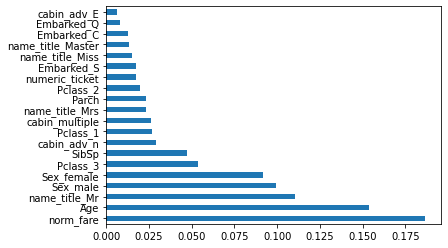

In [49]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [50]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 


print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())


voting_clf_hard : [0.768      0.832      0.864      0.776      0.86290323]
voting_clf_hard mean : 0.8205806451612905
voting_clf_soft : [0.784      0.856      0.848      0.784      0.86290323]
voting_clf_soft mean : 0.8269806451612904
voting_clf_all : [0.792      0.848      0.848      0.76       0.87096774]
voting_clf_all mean : 0.8253935483870969


In [51]:
#in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best Score: 0.8237935483870968
Best Parameters: {'weights': [2, 2, 1]}


In [52]:
#Make Predictions 
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)

In [53]:
#convert output to dataframe 
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all}
comparison = pd.DataFrame(data=final_data_comp)

In [54]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [55]:
comparison.difference_hard_all.value_counts()

0    258
1      9
Name: difference_hard_all, dtype: int64

In [56]:
#prepare submission files 
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
